In [1]:
import numpy as np
import argparse
import os

from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark3_for_rearr as Benchmark3
# from pytamp.benchmark import Benchmark3

from pytamp.search.mcts_for_rearragement import MCTS_rearrangement 


# ? python3 benchmark2_test.py --budgets 100 --max_depth 14 --seed 1 --algo bai_perturb
parser = argparse.ArgumentParser(description="Test Benchmark 3.")
parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
parser.add_argument("--max_depth", metavar="H", type=int, default=12, help="Max depth")
parser.add_argument("--seed", metavar="i", type=int, default=16, help="A random seed")
parser.add_argument(
    "--algo",
    metavar="alg",
    type=str,
    default="uct",
    choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
    help="Choose one (bai_perturb, bai_ucb, uct)",
)
parser.add_argument(
    "--debug_mode",
    default=False,
    type=lambda x: (str(x).lower() == "true"),
    help="Debug mode",
)
parser.add_argument(
    "--bottle_number",
    metavar="N",
    type=int,
    default=3,
    help="Bottle Number(6 or less.)",
)
try:
    args = parser.parse_args() #call from command line
except:
    args = parser.parse_args(args=[]) #call from notebook
    

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
number = args.bottle_number
np.random.seed(seed)

benchmark3 = Benchmark3(robot_name="panda", geom="collision", is_pyplot=False)


2023-08-07 04:55:40.821284: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--bottle_number N]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-f88c886a-deaf-47dc-9aaa-7e15ec5008d4.json


*********************** Logical States ***********************
OrderedDict([('rect_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('rect_box1',
              {'on': Object(name=rect_box0, pos=[0.72       0.3        0.79294036])}),
             ('rect_box2',
              {'on': Object(name=rect_box1, pos=[0.72       0.3        0.86631922])}),
             ('square_box0',
              {'on': Object(name=table, pos=[ 1.   -0.6  -0.03])}),
             ('square_box1',
              {'on': Object(name=square_box0, pos=[0.8        0.4        0.79125948])}),
             ('square_box2',
              {'on': Object(name=square_box1, pos=[0.8        0.4        0.86225948])}),
             ('goal_can',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk1',
              {'on': Object(name=clearbox, pos=[0.7        0.4        0.73547763])}),
             ('milk2',
              {'on': Object(name=clea

In [2]:
for n, m in benchmark3.init_scene._support_objects.items():
    print(n)

table
tray_blue


In [3]:
# fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# # init_scene
# benchmark3.scene_mngr.render_scene(ax)
# benchmark3.render_axis(benchmark3.scene_mngr)
# benchmark3.scene_mngr.show()


In [4]:

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)
# c_list = c_list[6:]
c = 2.5

mcts = MCTS_rearrangement(
    scene_mngr=benchmark3.scene_mngr,
    init_scene = benchmark3.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c_list[6],
    debug_mode=debug_mode,
    use_pick_action=False,
    consider_next_scene=False,
    do_level_2=True,
    
)

mcts.only_optimize_1 = False

2023-08-07 04:55:42.025713: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-07 04:55:42.077575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 04:55:42.077701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-07 04:55:42.077738: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-07 04:55:42.079854: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 04:55:42.079915: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-07 04:55:44.175005: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 04:55:44.176193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 04:55:44.176317: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-07 04:55:44.176414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-07 04:55:44.426972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-07 04:55:44.426998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-07 04:55:44.427002: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-07 04:55:44.427145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 04:55:44.427268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 04:55:44.427321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [5]:
import time
start_time = time.time()
idx = 0 


for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark3.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 1 ===========
[Action] Rearr square_box2 to table
[Reward] S(0) -> A(2) -> S'(8) Reward : -0.5
[Action] Rearr square_box1 to table
[Reward] S(8) -> A(10) -> S'(15) Reward : -0.5
[Action] Rearr milk3 to table
[Reward] S(15) -> A(19) -> S'(22) Reward : -0.5
[Action] Rearr milk1 to table
[Reward] S(22) -> A(24) -> S'(27) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(27) -> A(31) -> S'(32) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
square_box2
Extracted Region Cube Size:  0.4
Random sample points 


2023-08-07 04:55:45.610206: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-07 04:55:45.962578: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-07 04:55:46.487004: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 04:55:46.774469: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 7 grasps for object square_box2
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0065 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

square_box1
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 6 grasps for object square_box1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (36, 4, 4)
Collision free grasps step 3 :  (1, 4, 4)
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

failed to generate grasp pose for square_box1
goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (6, 4, 4)
Collision fr

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

failed to generate grasp pose for square_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 11 grasps for object square_box2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object square_box1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (12, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for square_box1
Extracted Regi

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4010887709599624
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

failed to generate grasp pose for milk1
rect_box2
Extracted Region Cube Size:  0.4
Random samp

Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 89
WorkingTime[inverse_kinematics]: 0.0399 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4006970792079525
Random sample points 
failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 71
WorkingTime[inverse_kinematics]: 0.0320 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 3 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[invers

[Reward] S(188) -> A(191) -> S'(193) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(193) -> A(197) -> S'(198) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
rect_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 41 grasps for object rect_box2
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0044 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0020 sec

milk1
Extracted Region Cube Size:  0.4012505562464366
Random sample points 
Generated 7 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 29
WorkingTime[inverse_kinematics]: 0.0133 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0036 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0011 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0011 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0011 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 9
WorkingTim

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Generated 1 grasps for object goal_can
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0089 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

pick rect_box2
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0061 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.999
WorkingTime[run]: 1.2223 sec

WorkingTime[run]: 0.0463 sec

WorkingTime[run]: 0.0468 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.056
WorkingTime[run]: 1.2901 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

Retry compute IK.. Pose error is 0.386077 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

Retry compute IK.. Pose error is 0.386037 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0555 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0472 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

Retry compute IK.. Pose error is 0

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

WorkingTime[run]: 2.2567 sec

Place joint Fail
[[0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], [0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], [0, 1, 33, 34, 39, 41, 45, 49, 50], [0, 1, 33, 34, 39, 41, 45, 49, 50], [0, 3, 51, 56, 57], [0, 3, 51, 56, 57], [0, 4, 58, 60, 64, 66, 71, 76, 77], [0, 4, 58, 60, 64, 66, 71, 76, 77], [0, 5, 78, 83, 84], [0, 6, 85, 88, 91, 92, 96, 97, 102, 105, 106], [0, 7, 107], [0, 5, 78, 79, 108, 110, 114, 118, 120, 123, 124], [0, 1, 33, 35, 125, 126, 131, 133, 136, 138, 139], [0, 4, 58, 59, 140, 144, 147, 149, 152, 153, 154], [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], [0, 6, 85, 86, 183, 185, 188, 191, 193, 197, 198], [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], [0, 1, 33, 36, 214, 219, 220]]
 level 2 value : -inf 
Add level_1_node!
#####

Iterators : 83
WorkingTime[inverse_kinematics]: 0.0377 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 4 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[invers

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

failed to generate grasp pose for square_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 7 grasps for object square_box2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0470 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 41
WorkingTime[inverse_kinematics]: 0.0187 sec

failed to generate grasp pose for squ

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
This optimal subnodes([0, 4, 58, 62, 293, 296, 297]) is infeasible subnodes.
 level 2 value : -inf 
Add level_1_node!
########### Running time :  77.48881220817566 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 21 ===========
[Action] Rearr milk3 to table
[Reward] S(0) -> A(5) -> S'(78) Reward : -0.5
[Action] Rearr milk4 to table
[Reward] S(78) -> A(82) -> S'(298) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(298) -> A(301) -> S'(302) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
milk4
Extracted Region Cube Size:  0.4
Random sample points 
Generated 17 grasps for object milk4
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0075 sec

solv

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 14 grasps for object goal_can
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

pick milk4
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0074 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 8 --> 70
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.019
WorkingTime[run]: 1.2147 sec

WorkingTime[run]: 0.0462 sec

WorkingTime[run]: 0.0468 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 3.134
WorkingTime[run]: 1.1645 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0056 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.455
WorkingTime[run]: 1.2840 sec

WorkingTime[run]: 0.0459 sec

WorkingTime[run]: 0.0461 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Cost is 2.659
WorkingTime[run]: 1.2393 sec

Success pnp
pick milk3
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0089 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.921
WorkingTime[run]: 1.2180 sec

WorkingTime[run]: 0.0469 sec

WorkingTime[run]: 0.0463 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 4.006
WorkingTime[run]: 1.1617 sec

solve with LM1
Iterators : 36
WorkingTime[inverse_kinematics]: 0.0163 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.011101
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000005
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.23
WorkingTime[run]: 1.3347 sec

WorkingTime[run]: 0.0462 sec

WorkingTime[run]: 0.0488 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Cost is 3.212
WorkingTime[run]: 1.2467 sec

Success pnp
pick milk2
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0060 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.333
WorkingTime[run]: 1.2827 sec

WorkingTime[run]: 0.0470 sec

WorkingTime[run]: 0.0467 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 2.394
WorkingTime[run]: 1.2400 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0042 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.561
WorkingTime[run]: 1.4213 sec

WorkingTime[run]: 0.0469 sec

WorkingTime[run]: 0.0789 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 12 --> 110
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000007


Cost is 3.634
WorkingTime[run]: 1.3074 sec

Success pnp
pick rect_box2
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0048 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 19 --> 180
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.214
WorkingTime[run]: 1.3105 sec

WorkingTime[run]: 0.0473 sec

WorkingTime[run]: 0.0618 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.287
WorkingTime[run]: 1.3241 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

Retry compute IK.. Pose error is 0.398884 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

Retry compute IK.. Pose error is 0.399124 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

Retry compute IK.. Pose error is 0.399140 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

Retry compute IK.. Pose error is 0.398906 
solve with LM1
Iterators

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

WorkingTime[run]: 2.2719 sec

Place joint Fail
[[0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], [0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], [0, 1, 33, 34, 39, 41, 45, 49, 50], [0, 1, 33, 34, 39, 41, 45, 49, 50], [0, 3, 51, 56, 57], [0, 3, 51, 56, 57], [0, 4, 58, 60, 64, 66, 71, 76, 77], [0, 4, 58, 60, 64, 66, 71, 76, 77], [0, 5, 78, 83, 84], [0, 6, 85, 88, 91, 92, 96, 97, 102, 105, 106], [0, 7, 107], [0, 5, 78, 79, 108, 110, 114, 118, 120, 123, 124], [0, 1, 33, 35, 125, 126, 131, 133, 136, 138, 139], [0, 4, 58, 59, 140, 144, 147, 149, 152, 153, 154], [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], [0, 6, 85, 86, 183, 185, 188, 191, 193, 197, 198], [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], [0, 1, 33, 36, 214, 219, 220], [0, 4, 58, 61, 221, 225, 226], [0, 5, 78, 81, 

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 1 grasps for object goal_can
solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0086 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

Already know path
pick goal_can
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000009
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.504
WorkingTime[run]: 1.2322 sec

WorkingTime[run]: 0.0463 sec

WorkingTime[run]: 0.0454 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000000


Cost is 3.517
WorkingTime[run]: 1.2160 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0058 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 7 --> 60
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.417
WorkingTime[run]: 1.3072 sec

WorkingTime[run]: 0.0458 sec

WorkingTime[run]: 0.0458 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 6 --> 50


Cost is 2.495
WorkingTime[run]: 1.2437 sec

Success pnp
History : 8.0 value_sum : 0.051100000000000007
Update Sub optimal Nodes!! Value is 8.0511.
 level 2 value : 8.0511 
History : 8.0 value_sum : 0.051100000000000007
Add level_1_node!
Add level_2_node!
########### Running time :  108.4230694770813 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 25 ===========
[Action] Rearr square_box2 to table
[Reward] S(0) -> A(2) -> S'(8) Reward : -0.5
[Action] Rearr milk4 to table
[Reward] S(8) -> A(13) -> S'(327) Reward : -0.5
[Action] Rearr milk3 to table
[Reward] S(327) -> A(332) -> S'(334) Reward : -0.5
[Action] Rearr milk1 to table
[Reward] S(334) -> A(337) -> S'(340) Reward : -0.5
[Action] Rearr rect_box2 to table
[Reward] S(340) -> A(341) -> S'(345) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(345) -> A(348) -> S'(349) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
milk4
Extracted Region Cube 

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object square_box1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (6, 4, 4)
Collision free grasps step 3 :  (1, 4, 4)
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 14 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterat

[Reward] S(8) -> A(14) -> S'(387) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
This optimal subnodes([0, 2, 8, 14, 387]) is infeasible subnodes.
 level 2 value : 8.0511 
Add level_1_node!
########### Running time :  126.15356159210205 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 33 ===========
[Action] Rearr rect_box2 to table
[Reward] S(0) -> A(1) -> S'(33) Reward : -0.5
[Action] Rearr milk3 to table
[Reward] S(33) -> A(36) -> S'(214) Reward : -0.5
[Action] Rearr rect_box1 to table
[Reward] S(214) -> A(215) -> S'(388) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(388) -> A(390) -> S'(391

Generated 8 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inv

Generated 23 grasps for object milk4
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0068 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

milk2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 61 grasps for object milk2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

collision !!! 
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0052 sec

collision !!! 
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0034 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

milk1
Extracted Region Cube Size:  0.4
Generated 25 grasps for object milk1
solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0117 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0043 sec

solve with LM1

Generated 46 grasps for object rect_box2
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

goal_can
Extracted Region Cube Size:  0.4
Random sample points 
Generated 1 grasps for object goal_can
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0025 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0029 sec

A value of this optimal nodes is lower than maximum value.
 level 2 value : 8.0511 
Add level_1_node!
########### Running time :  144.8041820526123 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 40 ===========
[Action] Rearr milk1 to table
[Reward] S(0) -> A(3) -> S'(51) Reward : -0.5
[Action] Rearr rect_box2 to table
[Reward] S(51) -> A(52) -> S'(482) Reward

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 11 grasps for object goal_can
solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0060 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0026 sec

pick milk2
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0076 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 9 --> 80
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.722
WorkingTime[run]: 1.2276 sec

WorkingTime[run]: 0.0477 sec

WorkingTime[run]: 0.0474 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 3.699
WorkingTime[run]: 1.1211 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

Retry compute IK.. Pose error is 0.703653 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

Retry compute IK.. Pose error is 0.704789 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

Retry compute IK.. Pose error is 0.705629 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

Retry compute IK.. Pose error is 0.705205 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

Retry compute IK.. Pose error is 0.704633 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinema

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

WorkingTime[run]: 2.2422 sec

Place joint Fail
[[0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], [0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], [0, 1, 33, 34, 39, 41, 45, 49, 50], [0, 1, 33, 34, 39, 41, 45, 49, 50], [0, 3, 51, 56, 57], [0, 3, 51, 56, 57], [0, 4, 58, 60, 64, 66, 71, 76, 77], [0, 4, 58, 60, 64, 66, 71, 76, 77], [0, 5, 78, 83, 84], [0, 6, 85, 88, 91, 92, 96, 97, 102, 105, 106], [0, 7, 107], [0, 5, 78, 79, 108, 110, 114, 118, 120, 123, 124], [0, 1, 33, 35, 125, 126, 131, 133, 136, 138, 139], [0, 4, 58, 59, 140, 144, 147, 149, 152, 153, 154], [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], [0, 6, 85, 86, 183, 185, 188, 191, 193, 197, 198], [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], [0, 1, 33, 36, 214, 219, 220], [0, 4, 58, 61, 221, 225, 226], [0, 5, 78, 81, 

[Reward] S(531) -> A(535) -> S'(537) Reward : -0.5
[Action] Rearr square_box1 to table
[Reward] S(537) -> A(539) -> S'(542) Reward : -0.5
[Action] Rearr milk1 to table
[Reward] S(542) -> A(543) -> S'(545) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(545) -> A(547) -> S'(548) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
already has grasp_poses
milk3
Extracted Region Cube Size:  0.4134596242097188
Random sample points 
Generated 31 grasps for object milk3
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0039 sec

solve with LM1
Iterators : 3
Working

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 41
WorkingTime[inverse_kinematics]: 0.0185 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

failed to generate grasp pose for square_box1
milk1
Extracted Region Cube Size:  0.4
Generated 47 grasps for object milk1
solve with LM1
Iterators : 71
WorkingTime[inverse_kinematics]: 0.0320 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]:

Generated 4 grasps for object milk2
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0083 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0021 sec

square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 15 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0709 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterator

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0454 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0038 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Generated 44 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0458 sec

sol

Iterators : 35
WorkingTime[inverse_kinematics]: 0.0165 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0042 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

failed to generate grasp pose for square_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 37 grasps for object square_box2
solve with LM1
Iterators : 100
WorkingTime[inv

[Action] Rearr goal_can to tray_blue
[Reward] S(616) -> A(620) -> S'(621) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
already has grasp_poses
rect_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 12 grasps for object rect_box1
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0020 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0020 sec

milk1
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kin

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 

Generated 12 grasps for object square_box2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0042 sec

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0051 sec

rect_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 9 grasps for object rect_box1
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0051 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 4

[Action] Rearr goal_can to tray_blue
[Reward] S(682) -> A(686) -> S'(687) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
already has grasp_poses
square_box2
Extracted Region Cube Size:  0.4
Random sample points 
Generated 19 grasps for object square_box2
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0428 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0430 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0431 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0441 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0430 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 1

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0049 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0044 sec

goal_can
Extracted Region Cube Size:  0.4
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Generated 2 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (12, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Generated 1 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (6, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for goal_can
A value of this optimal nodes is lower than maximum value.
 level 2 value : 8.0511 
Add level_1_node!
########### Running time :  213.25990319252014 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed:

Generated 1 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0562 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4005207075265218
Random sample points 
failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4009614118167659
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0472 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0446 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators

Extracted Region Cube Size:  0.4
Random sample points 
Generated 22 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 72
WorkingTime[inverse_kinematics]: 0.0329 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0456 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0450 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0457 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.045

Generated 39 grasps for object rect_box1
solve with LM1
Iterators : 13
WorkingTime[inverse_kinematics]: 0.0063 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0017 sec

goal_can
Extracted Region Cube Size:  0.4
Generated 24 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (144, 4, 4)
Collision free grasps step 3 :  (5, 4, 4)
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0067 sec

solve with LM1
Iterators : 23
WorkingTime[inverse_kinematics]: 0.0106 sec

A value of this optimal nodes is lower than maximum value.
 level 2 value : 8.0511 
Add level_1_node!
########### Running time :  231.7614243030548 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 75 ===========
[Action] Rearr milk2 to table
[Reward] S(0) -> A(4) -> S'(58) Reward

Extracted Region Cube Size:  0.4
Random sample points 
Generated 25 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0445 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0570 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0440 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0437 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0447 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 63
WorkingTime[inverse_kinematics]: 0.0281 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 8 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0453 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0439 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
Workin

failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
Generated 3 grasps for object goal_can
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (18, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for goal_can
Extracted Region Cube Size:  0.4
Random sample points 
failed to generate grasp pose for goal_can
A value of this optimal nodes is lower than maximum value.
 level 2 value : 8.0511 
Add level_1_node!
########### Running time :  250.6735520362854 ##############

[1/10] Benchmark: 3, Algo: uct, C: 2.5, Seed: 16
=========== Search iteration : 81 ===========
[Action] Rearr milk2 to table
[Reward] S(0) -> A(4) -> S'(58) Reward : -0.5
[Action] Rearr milk1 to table
[Reward] S(58) -> A(61) -> S'(221) Reward : -0.5
[Action] Rearr rect_box2 to table
[Reward] S(221) -> A(222) -> S'(817) Reward : -0.5
[Action] Rearr rect_box1 to table
[Reward] S(817) -> A(818) -> S'(822) Reward : -0.5
[Action] Rearr milk3 to table
[Reward] S(82

[Action] Rearr square_box1 to table
[Reward] S(843) -> A(844) -> S'(848) Reward : -0.5
[Action] Rearr milk4 to table
[Reward] S(848) -> A(849) -> S'(851) Reward : -0.5
[Action] Rearr milk3 to table
[Reward] S(851) -> A(852) -> S'(854) Reward : -0.5
[Action] Rearr goal_can to tray_blue
[Reward] S(854) -> A(855) -> S'(856) Reward : -0.5
Success!!!!!
Terminal State! Reward is 10
already has grasp_poses
milk1
Extracted Region Cube Size:  0.4010987655570788
Random sample points 
failed to generate grasp pose for milk1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object milk1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0461 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0442 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0449 sec

solve with

Iterators : 100
WorkingTime[inverse_kinematics]: 0.0491 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 2 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0466 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0438 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0433 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0432 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0444 sec

failed to generate grasp pose for square_box1
milk1
Extracted Region Cube Size:  0.40012300312923643
Random sample points 
Generated 6 grasps for object milk1
solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0163 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0010 sec

solve with LM1
Iterators : 1
Worki

Generated 2 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0451 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0436 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0448 sec

failed to generate grasp pose for square_box1
Extracted Region Cube Size:  0.4
Random sample points 
Generated 5 grasps for object square_box1
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0454 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0434 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0435 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0443 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kine

In [10]:
mcts.tree.nodes[318]

{'depth': 4,
 'state': <pytamp.scene.scene.Scene at 0x7ff9146613d0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'rect_box2',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.82430621, -0.56613659,  0.00293747,  0.71647164],
           [ 0.56614319, -0.8243035 ,  0.00237335, -0.41368018],
           [ 0.00107773,  0.0036194 ,  0.99999287,  0.77243664],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 9.0,
 'value_history': [9.0],
 'visit': 1,
 'number': 318,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': False,
 'cost': 0,
 'test': (),
 'grasp_set': array([[[-0.863752  ,  0.01738714,  0.50361714,  0.69254387],
         [-0.0040342 ,  0.99913394, -0.04141365,  0.30110196],
         [-0.50390105, -0.03780282, -0.86293378,  1.04176125],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        [[ 0.97543056, -0.10200738,  0.19526869,  0.73129358],
         [-0.085375

In [6]:
mcts.history_level_2_dict

{0: {'nodes': [0, 1, 33, 38, 326], 'value': 8.0511}}

In [7]:
mcts.tree.nodes[1]

{'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7ffa720c41c0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'rect_box2',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.90710105, -0.42090549,  0.00250105,  0.8403828 ],
           [ 0.42091154, -0.90709728,  0.00282953, -0.25065267],
           [ 0.00107773,  0.0036194 ,  0.99999287,  0.77243664],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 9.0,
 'value_history': [7.0,
  6.0,
  8.0,
  5.0,
  9.0,
  9.0,
  7.0,
  4.0,
  7.0,
  9.0,
  5.0,
  5.0,
  3.0,
  2.0,
  9.0,
  7.0],
 'visit': 16,
 'number': 1,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': True,
 'cost': 0,
 'test': (),
 'grasp_set': array([[[ 0.95124402, -0.0739402 ,  0.29944563,  0.69392733],
         [-0.06816376, -0.99723184, -0.02970542,  0.30609078],
         [ 0.30081315,  0.00784575, -0.95365082,  1.04877219],
         [ 0.        ,  0.        ,  0.      

In [19]:
mcts.tree.nodes[33]

{'number': 33,
 'visit': 16,
 'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7ff95e372820>,
 'action': {'table': array([[-0.90710105, -0.42090549,  0.00250105,  0.8403828 ],
         [ 0.42091154, -0.90709728,  0.00282953, -0.25065267],
         [ 0.00107773,  0.0036194 ,  0.99999287,  0.77243664],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[ 0.95124402, -0.0739402 ,  0.29944563,  0.69392733],
         [-0.06816376, -0.99723184, -0.02970542,  0.30609078],
         [ 0.30081315,  0.00784575, -0.95365082,  1.04877219],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[ 0.951244  , -0.0739402 ,  0.29944563,  0.6789551 ],
         [-0.06816376, -0.99723184, -0.02970542,  0.30757606],
         [ 0.30081314,  0.00784575, -0.95365083,  1.0964547 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[ 0.951244  , -0.0739402 ,  0.29944563,  0.69392735],

In [8]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value = mcts.history_level_1_dict[1]

print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

{'nodes': [0, 1, 33, 34, 39, 41, 45, 49, 50], 'value': 6.0} {0: {'nodes': [0, 2, 8, 10, 15, 19, 22, 24, 27, 31, 32], 'value': 5.0}, 1: {'nodes': [0, 1, 33, 34, 39, 41, 45, 49, 50], 'value': 6.0}, 2: {'nodes': [0, 3, 51, 56, 57], 'value': 8.0}, 3: {'nodes': [0, 4, 58, 60, 64, 66, 71, 76, 77], 'value': 6.0}, 4: {'nodes': [0, 5, 78, 83, 84], 'value': 8.0}, 5: {'nodes': [0, 6, 85, 88, 91, 92, 96, 97, 102, 105, 106], 'value': 5.0}, 6: {'nodes': [0, 7, 107], 'value': 9.0}, 7: {'nodes': [0, 5, 78, 79, 108, 110, 114, 118, 120, 123, 124], 'value': 5.0}, 8: {'nodes': [0, 1, 33, 35, 125, 126, 131, 133, 136, 138, 139], 'value': 5.0}, 9: {'nodes': [0, 4, 58, 59, 140, 144, 147, 149, 152, 153, 154], 'value': 5.0}, 10: {'nodes': [0, 2, 8, 9, 155, 158, 162, 165, 168, 169, 171, 172, 175, 177, 179, 181, 182], 'value': 2.0}, 11: {'nodes': [0, 6, 85, 86, 183, 185, 188, 191, 193, 197, 198], 'value': 5.0}, 12: {'nodes': [0, 5, 78, 80, 199, 202, 204, 206, 209, 212, 213], 'value': 5.0}, 13: {'nodes': [0, 1, 33

In [12]:
print(minimum_cost_nodes)

[0, 1, 33, 38, 326]


In [ ]:
# ,mcts.tree.nodes[]
print(minimum_cost_nodes)

mcts.tree.nodes[357].get('test')

In [11]:
minimum_cost_nodes = mcts.get_minimum_cost_node()

In [15]:
mcts.tree.nodes[33]['test'] = (mcts.tree.nodes[1]['action']['rearr_obj_name'], mcts.tree.nodes[1]['action']['rearr_poses'][0][mcts.tree.nodes[1]['action']['place_obj_name']])

In [16]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(minimum_cost_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [17]:
minimum_cost_nodes

[0, 1, 33, 38, 326]

0 scene
100 scene
200 scene
300 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


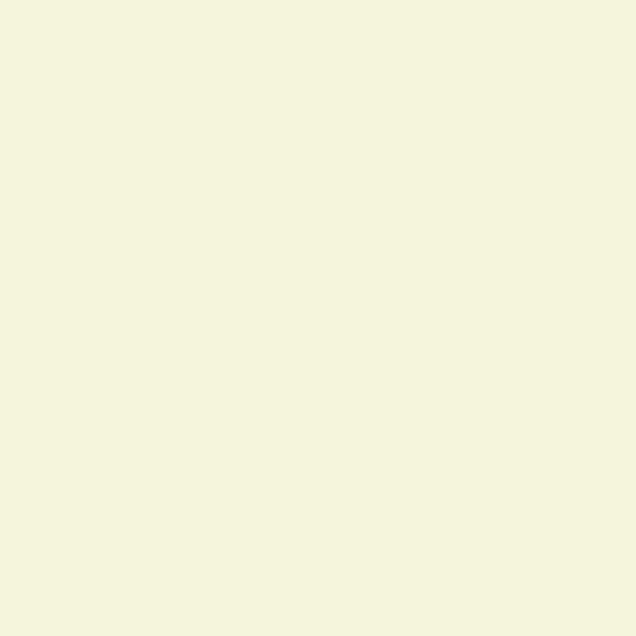

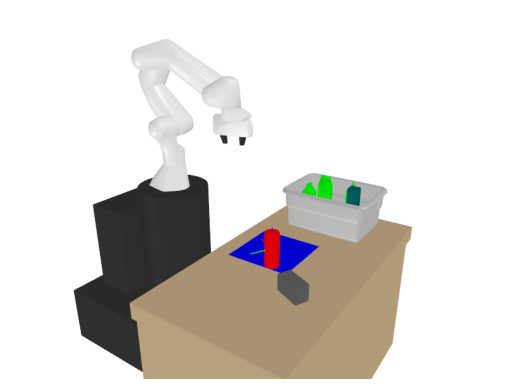

In [18]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark3_grasp_using_contact_graspnet_consider_next_scene_block_5",
)


In [17]:
mcts.history_level_2_dict

{0: {'nodes': [0, 1, 32, 33, 38, 42, 45, 47, 48], 'value': 6.18},
 1: {'nodes': [0, 4, 77, 78, 319, 321, 324, 325, 329, 331, 332],
  'value': 6.18}}

In [15]:
nodes

[0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]

nodes [0, 1, 32, 33, 39, 44, 47, 50, 52, 54, 55]
Here doesn't have grasp


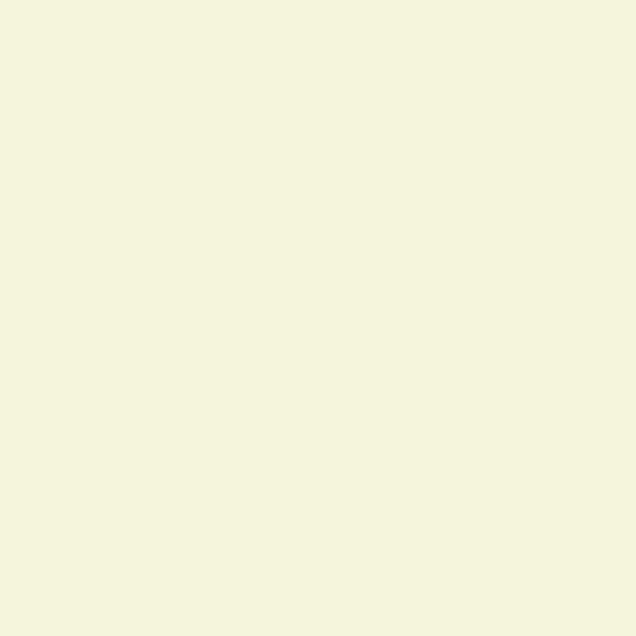

In [18]:
max_level_1_value = mcts.get_max_value_level_1()


fig, ax = p_utils.init_3d_figure(name="Level wise 1")

# nodes = mcts.infeasible_sub_nodes[0]
# nodes = mcts.history_level_1_dict[4]['nodes']
# j, nodes = mcts.get_max_value_nodes_level_1()

nodes = mcts.history_level_1_dict[4]['nodes']

print("nodes", nodes)
i = 0
for i in range(len(nodes)//2):
    mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i)+1]]['state'])
    
    grasp = mcts.tree.nodes[nodes[2*(i)+1]].get('grasp_poses')
    if grasp:
        grasp = grasp[0]['grasp']
    else:
        print("Here doesn't have grasp")
        
        mcts.rearr_action.scene_mngr.render_objects(ax)
        p_utils.plot_basis(ax)
        mcts.rearr_action.show()
        break
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    
    gripper_kinematics_info = mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_fk()

    gripper_tip_poses = mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose()


    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['leftfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, gripper_kinematics_info['rightfinger'])
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['rightfinger']))
    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.scene_mngr.scene.robot.gripper.compute_gripper_tip_pose_from_gripper_pose(gripper_kinematics_info['leftfinger']))

    mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    mcts.rearr_action.scene_mngr.render_gripper(ax)

    mcts.rearr_action.scene_mngr.render_objects(ax)
    p_utils.plot_basis(ax)
    mcts.rearr_action.show()

In [33]:
nodes = mcts.history_level_1_dict[4]['nodes']

In [51]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 0

current_node = mcts.tree.nodes[nodes[2*i + 1]]
next_node = mcts.tree.nodes[nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = benchmark3.init_scene,
    next_node = next_node,
    current_node = current_node,
    )

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



milk3
Extracted Region Cube Size:  0.4140609034817153
Random sample points 
Generated 9 grasps for object milk3


In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes[2*(i) +1]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [20]:
obj_file_path = '/home/juju/contact_graspnet/acronym/meshes/5Shelves/4382a7a2860ff8dda67210eeab485ee6.obj'